#Haneesh Chowdary Sriram (16376630)

#1. Dataset Setup

##Introduction of your dataset (1–2 markdown cells)


In [ ]:
import pandas as pd
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
df = pd.read_csv("Ames_Housing.csv")
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2937 non-null   int64  
 1   PID              2937 non-null   int64  
 2   MS SubClass      2937 non-null   int64  
 3   MS Zoning        2937 non-null   object 
 4   Lot Frontage     2446 non-null   float64
 5   Lot Area         2937 non-null   int64  
 6   Street           2937 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2937 non-null   object 
 9   Land Contour     2937 non-null   object 
 10  Utilities        2937 non-null   object 
 11  Lot Config       2937 non-null   object 
 12  Land Slope       2937 non-null   object 
 13  Neighborhood     2937 non-null   object 
 14  Condition 1      2937 non-null   object 
 15  Condition 2      2937 non-null   object 
 16  Bldg Type        2937 non-null   object 
 17  House Style   

<Axes: >

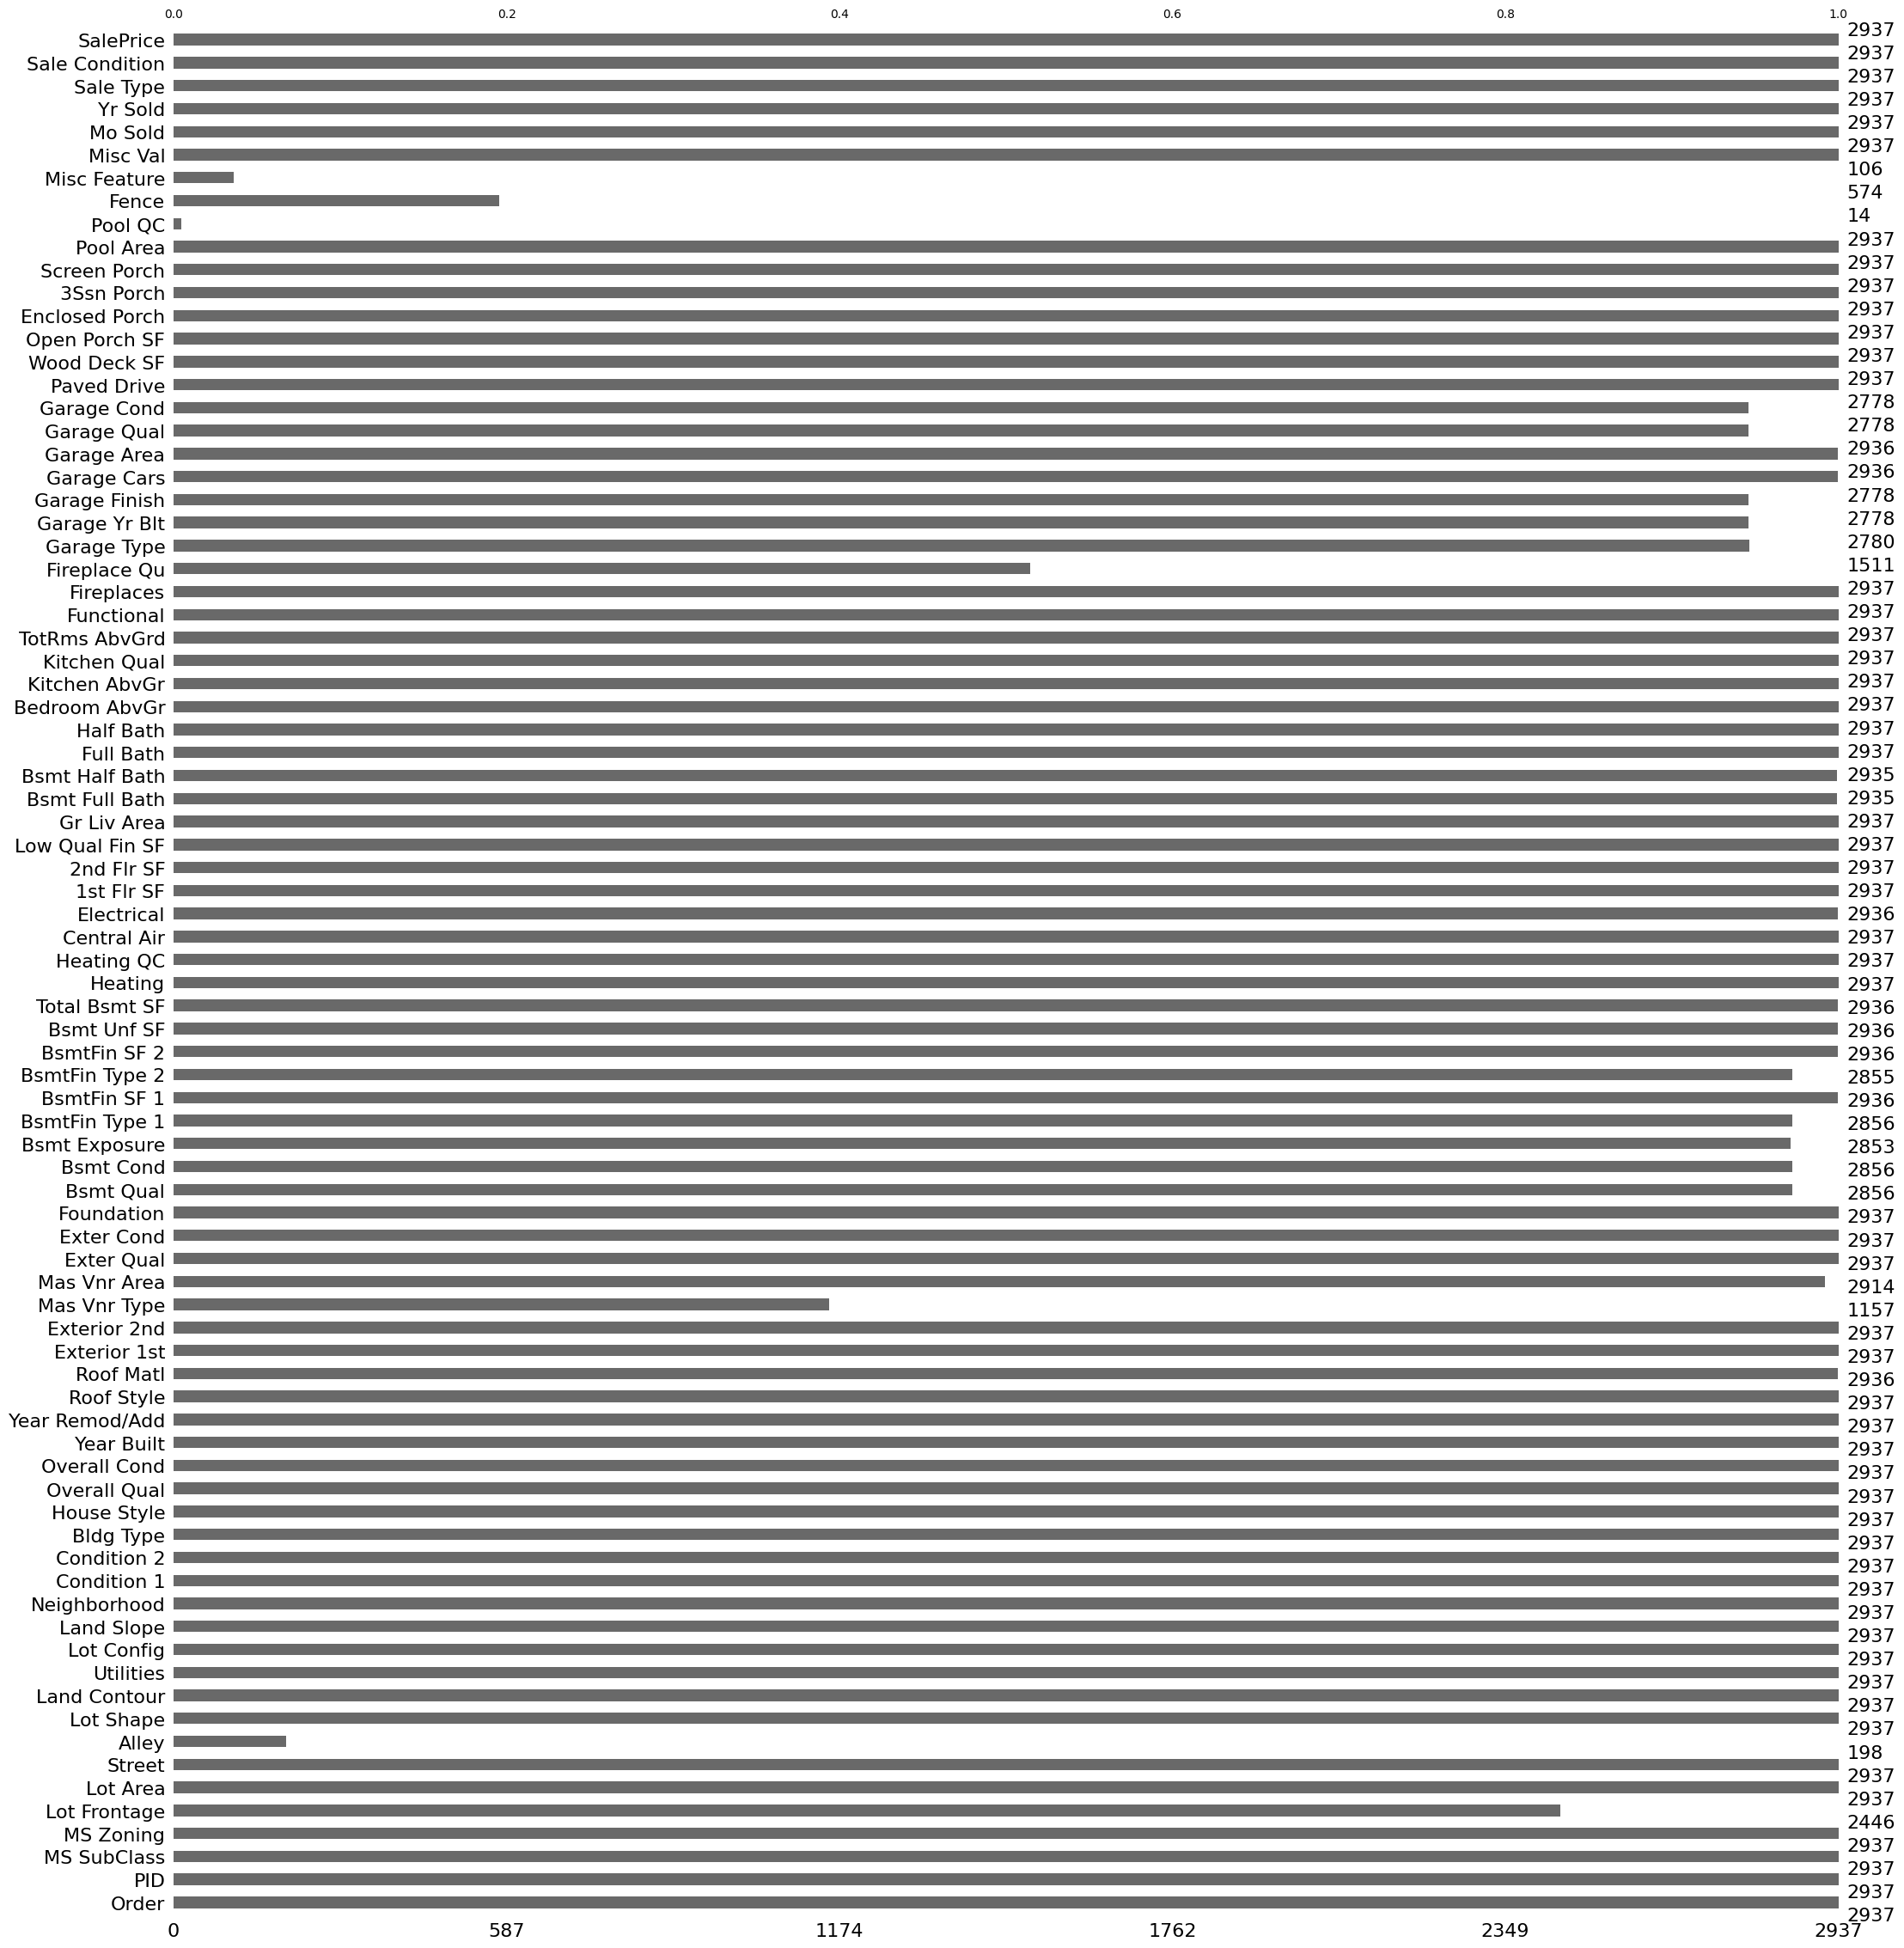

In [ ]:
msno.bar(df)

<Axes: >

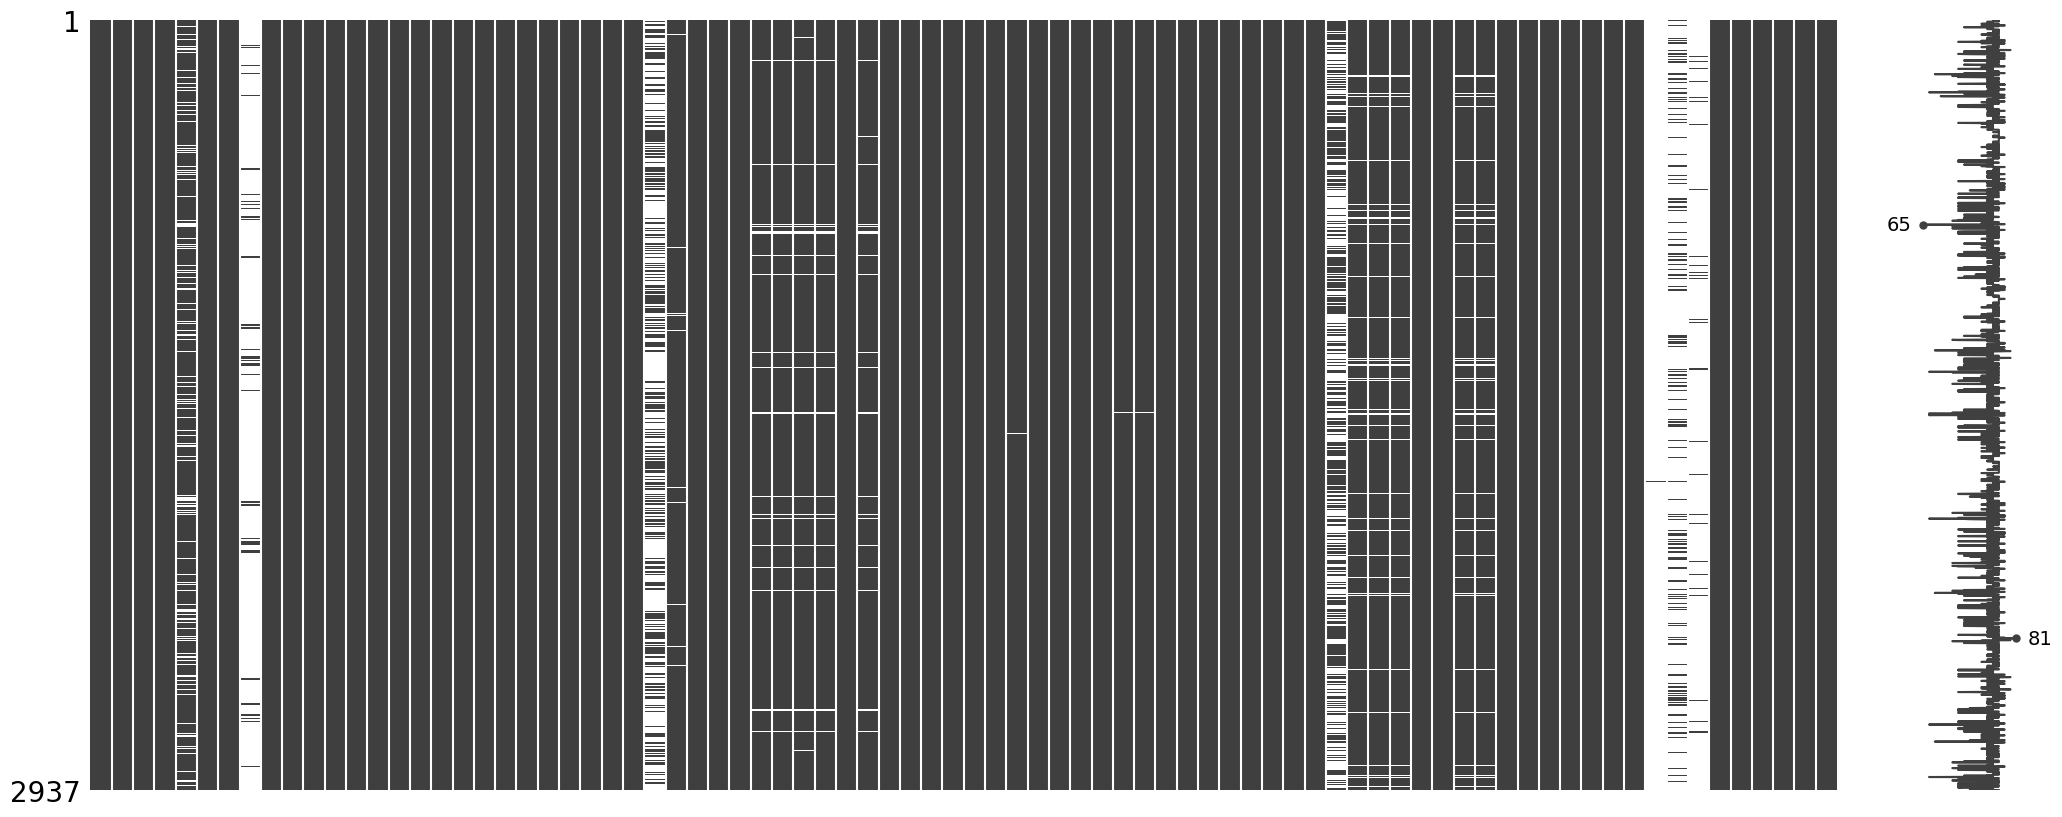

In [ ]:
msno.matrix(df)

##Brief re-introducion of the dataset
### dataset is comprehensive house sales dataset from Ames, Iowa. The dataset contains 2937 rows and 82 columns. It has a wide range of features like  Location details, House Lot details, Basement details, pool, exterior materials, heating types, Overall quality, time of building, utilities, condition ratings, garage details, sales price and conditions, etc recorded in the 82 columns. There are also quite a lot of missing values in the data, especially pool related data is almost 99% missing. There are also few details missing commonly for all the details with respect to that feature. For example, the garage and basement feature have variables with respect to it like Garage Type, Garage Year Built, Garage Finish, etc and Base Quality, Basement condition, exposure, all the variable w.r.t it are missing.

#2. Data Cleaning & Preprocessing

##Handle missing values, duplicates, and outliers

##Encode categorical features

##Normalize or scale features appropriately

###The coulumns Misc Feature, Pool QC and Alley have very less number of values, and taking them into consideration for the model predictions might effect the  model performance. So the three columns are dropped.

In [ ]:
df = df.drop(['Misc Feature', 'Pool QC', 'Alley'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2937 entries, 0 to 2936
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2937 non-null   int64  
 1   PID              2937 non-null   int64  
 2   MS SubClass      2937 non-null   int64  
 3   MS Zoning        2937 non-null   object 
 4   Lot Frontage     2446 non-null   float64
 5   Lot Area         2937 non-null   int64  
 6   Street           2937 non-null   object 
 7   Lot Shape        2937 non-null   object 
 8   Land Contour     2937 non-null   object 
 9   Utilities        2937 non-null   object 
 10  Lot Config       2937 non-null   object 
 11  Land Slope       2937 non-null   object 
 12  Neighborhood     2937 non-null   object 
 13  Condition 1      2937 non-null   object 
 14  Condition 2      2937 non-null   object 
 15  Bldg Type        2937 non-null   object 
 16  House Style      2937 non-null   object 
 17  Overall Qual  

In [ ]:
df_cleaned = df.dropna()
df_cleaned

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
19,20,527302110,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
20,21,527358140,20,RL,105.0,11751,Pave,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
21,22,527358200,85,RL,85.0,10625,Pave,Reg,Lvl,AllPub,...,0,0,0,MnPrv,0,1,2010,WD,Family,170000
81,82,531453040,60,RL,70.0,8400,Pave,Reg,Lvl,AllPub,...,0,204,0,MnPrv,0,4,2010,WD,Normal,171000
89,90,532479070,20,RL,39.0,15410,Pave,IR1,Lvl,AllPub,...,0,0,0,GdPrv,0,4,2010,WD,Abnorml,169000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,2699,904100030,50,RL,82.0,12375,Pave,Reg,Lvl,AllPub,...,0,0,0,GdWo,0,6,2006,WD,Normal,137500
2727,2721,905200290,20,RL,88.0,13125,Pave,Reg,Lvl,AllPub,...,0,0,0,GdPrv,0,1,2006,WD,Normal,155000
2745,2739,905427140,80,RL,78.0,11679,Pave,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,5,2006,WD,Normal,182000
2754,2748,906204180,60,RL,88.0,12128,Pave,IR1,Bnk,AllPub,...,0,168,0,MnPrv,0,11,2006,WD,Abnorml,209000


###Looks like there are lot of missing values in features, so dropping them is resulting in a very large data loss. So Dropping of values in not the primary task to be considered. Trying to fill the NA values

###Since there are may missing values for Fence and Mas Vnr Type, filling them with the frequent value, or using values by identifying relation with other features might not be a good call. So considering the missing values for these two features are considered fearure missing.

In [ ]:
df['Fence'] = df['Fence'].fillna('NoFence')
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna(0)

# Check if any missing values remain
print(df[['Fence', 'Mas Vnr Type']].isnull().sum())

Fence           0
Mas Vnr Type    0
dtype: int64


<Axes: >

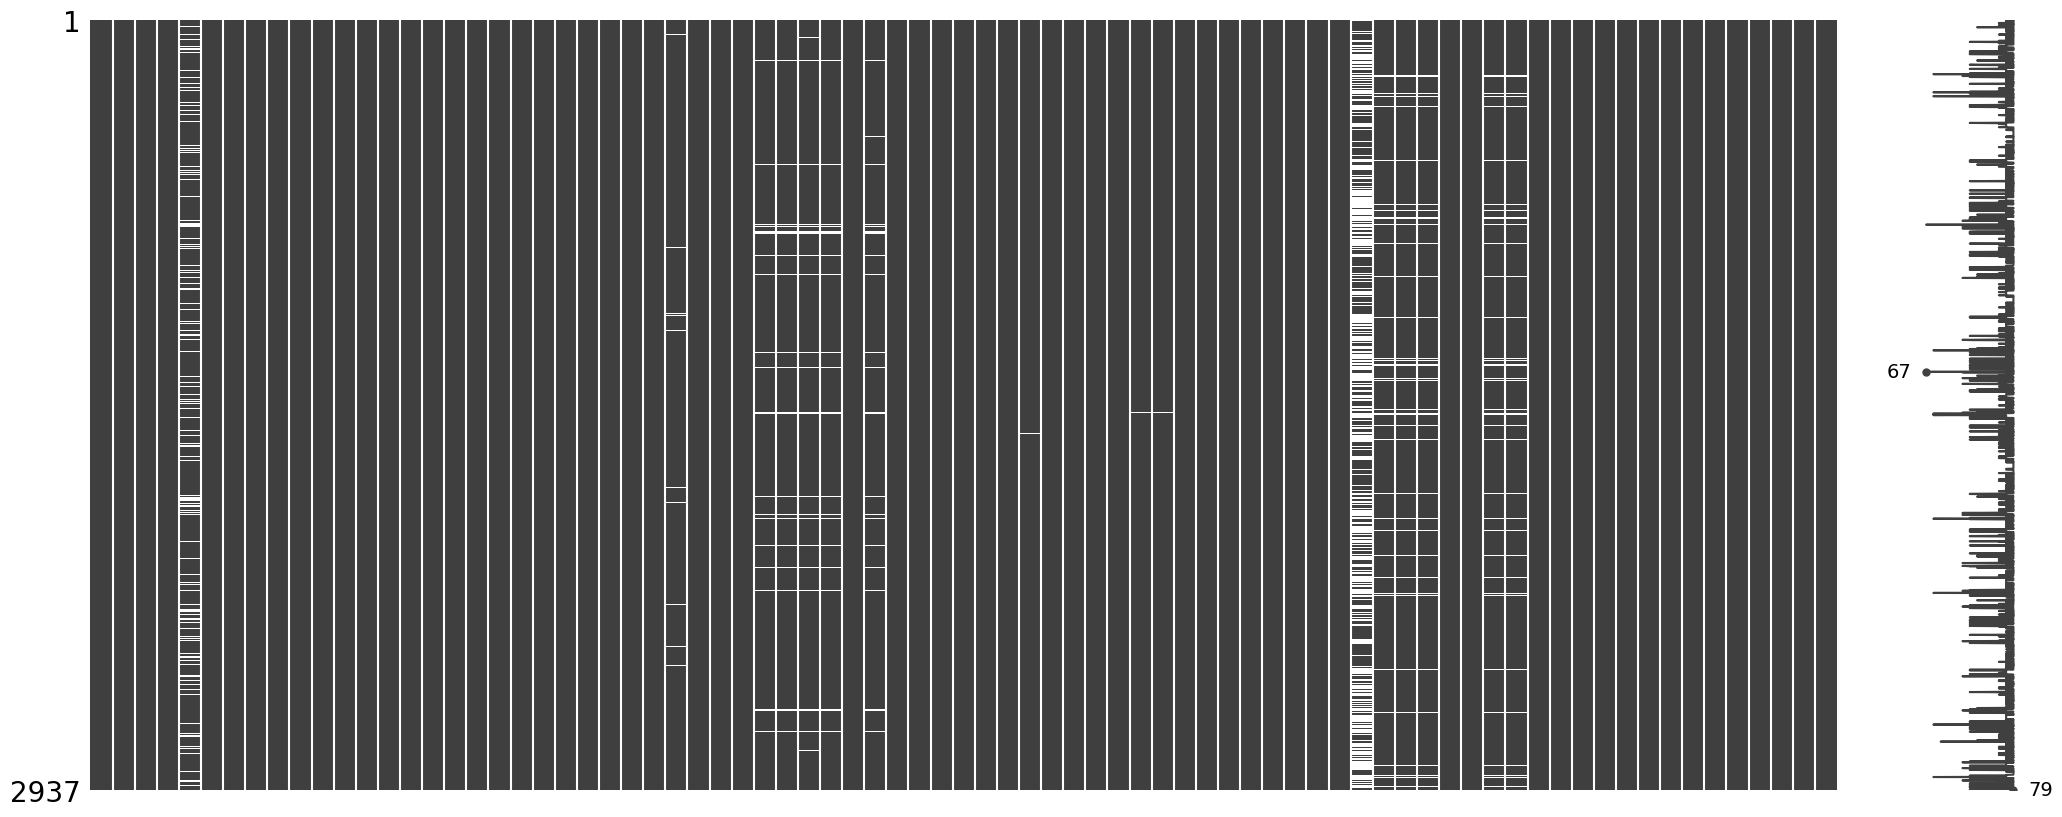

In [ ]:
msno.matrix(df)

###Seems like there is a pattern for garage and basement values missing, one value missing in one column, then the same values are missing for that related feature. So considering them as the feature not there.

In [ ]:
#Filling the missing basement features

from pandas.api.types import is_numeric_dtype

basement_features = [
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure",
    "BsmtFin Type 1", "BsmtFin SF 1",
    "BsmtFin Type 2", "BsmtFin SF 2",
    "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"
]

for col in basement_features:
    if col in df.columns:
      if is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)
      else:
        df[col] = df[col].fillna(0)

In [ ]:
#Filling the missing Garage features
garage_features = [
    "Garage Type", "Garage Yr Blt", "Garage Finish",
    "Garage Cars", "Garage Area",
    "Garage Qual", "Garage Cond", "Paved Drive"
]

for col in garage_features:
    if col in df.columns:
      if is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)
      else:
        df[col] = df[col].fillna(0)

##Filling the remaining missing values

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill numeric missing values with median (less sensitive to outliers)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical missing values with mode (most frequent value)
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

<Axes: >

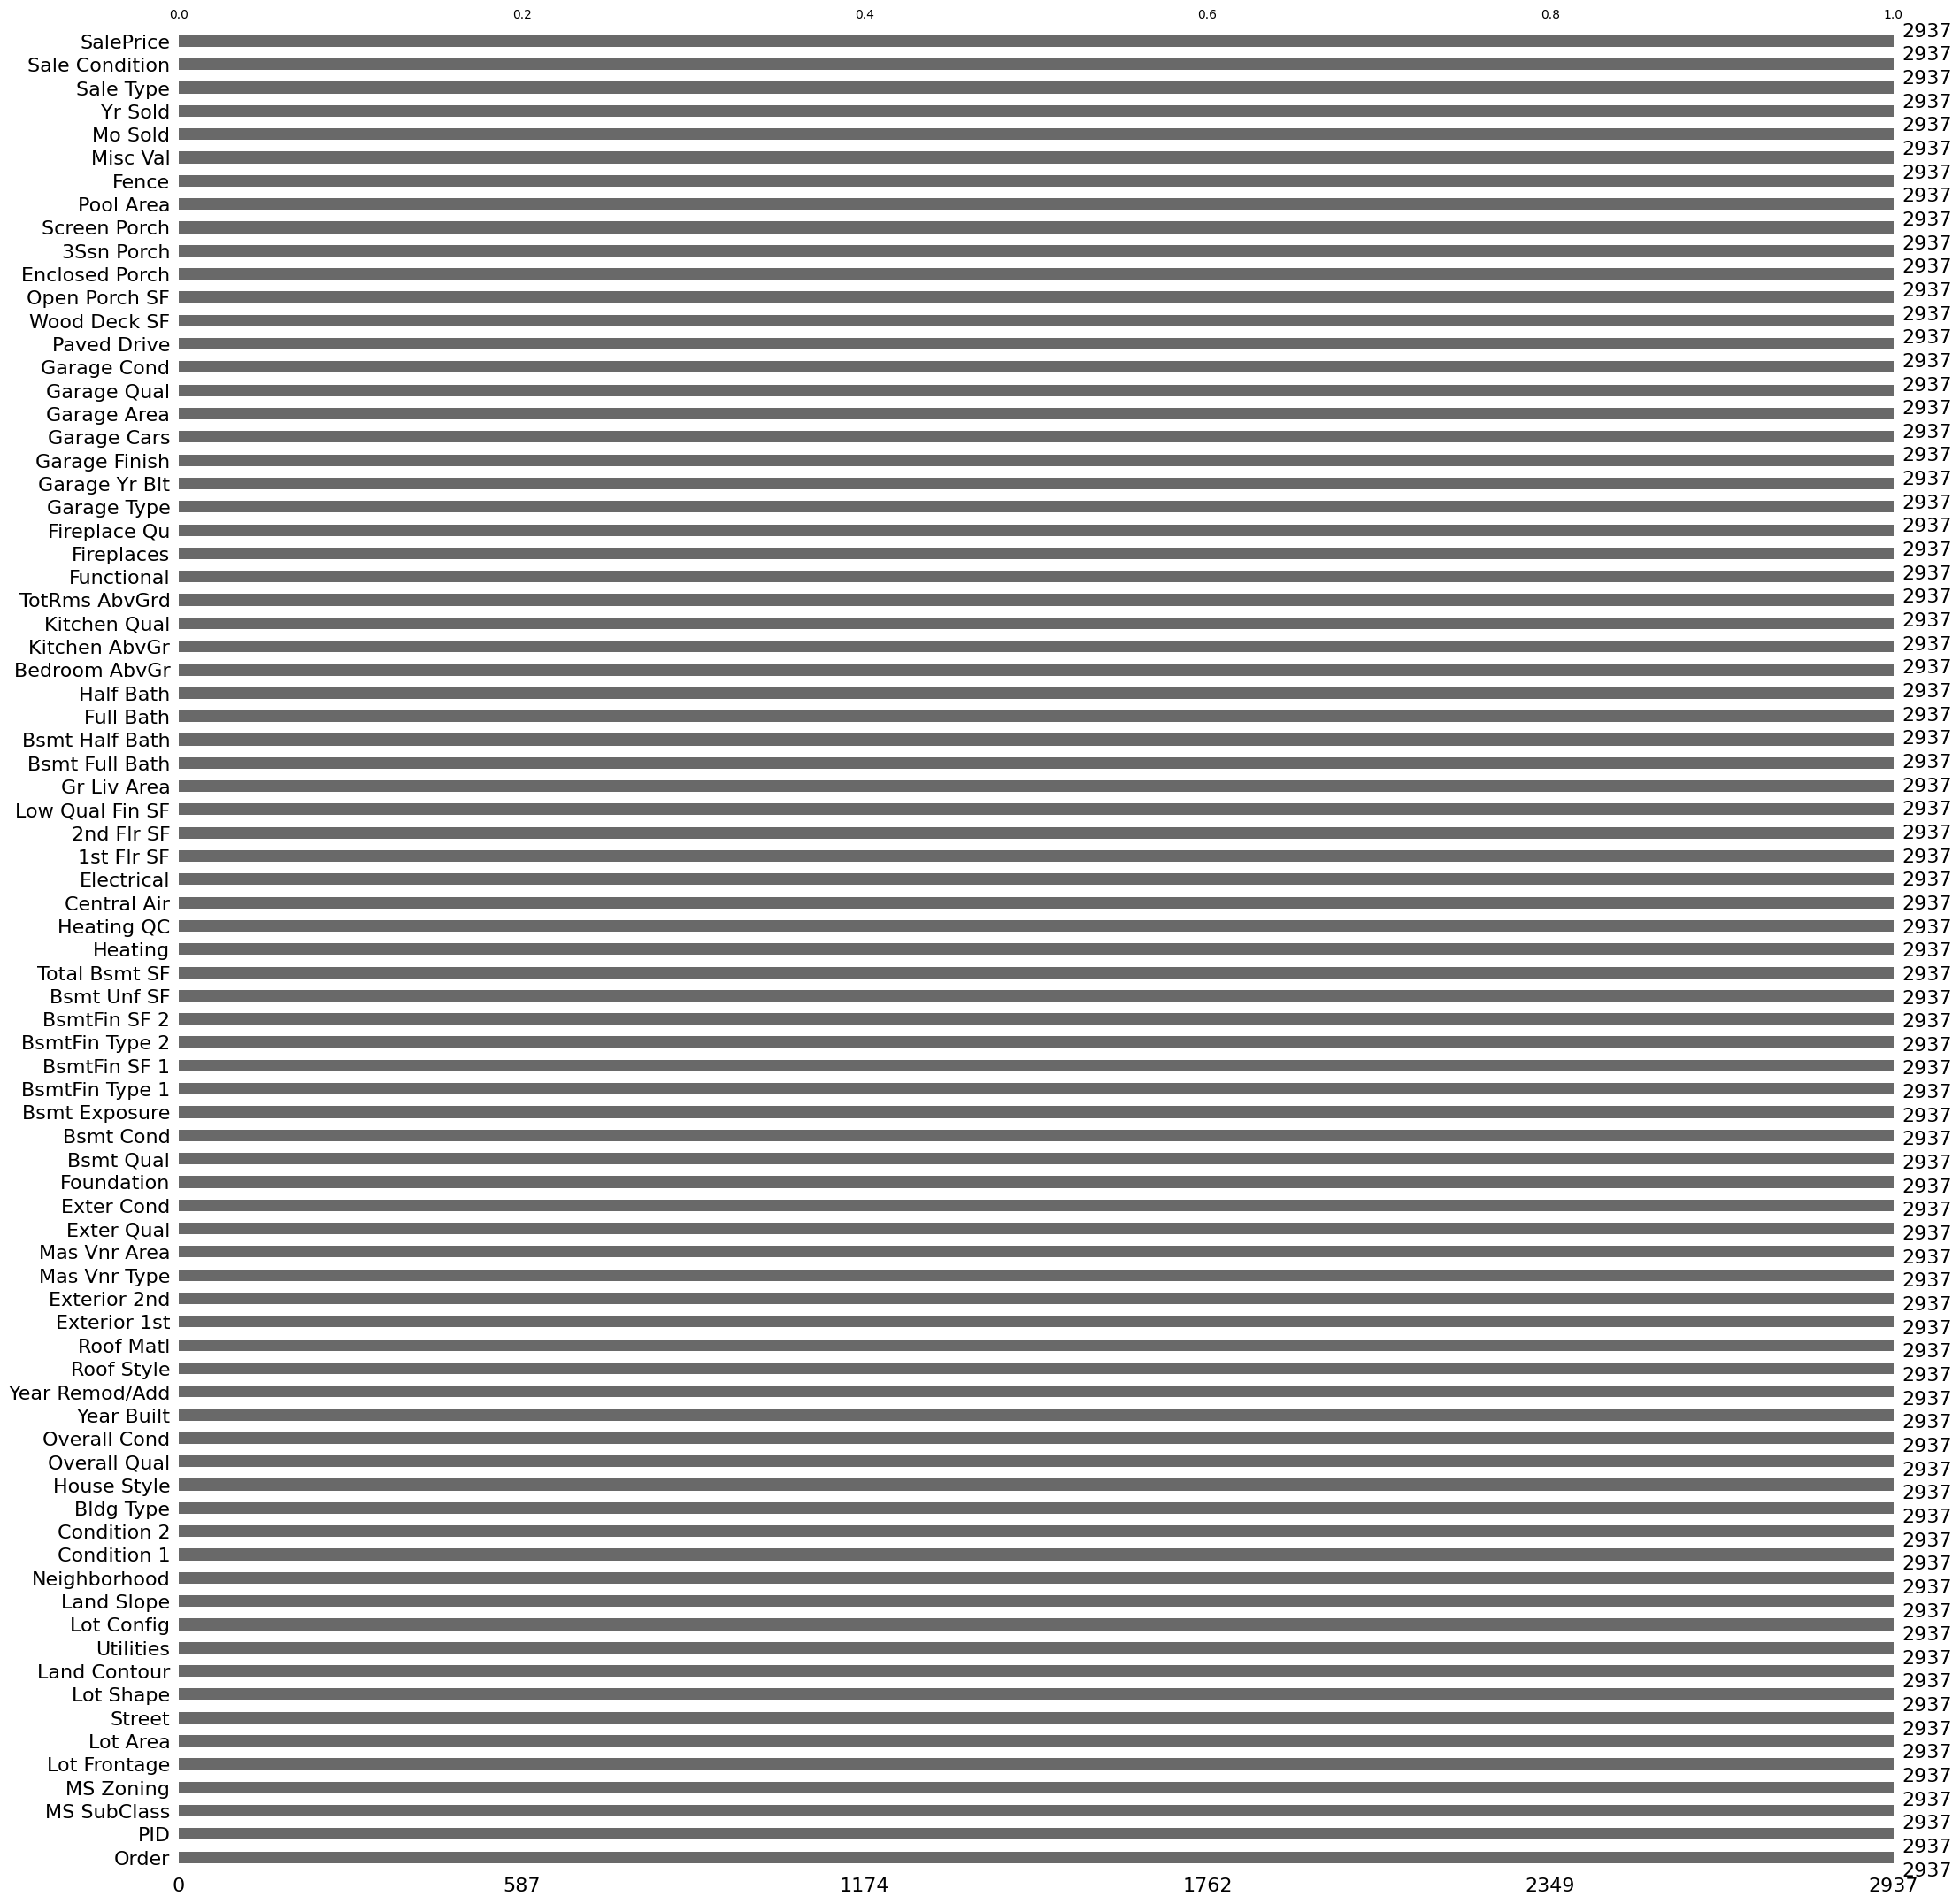

In [ ]:
msno.bar(df)

In [ ]:
#Checking for duplicates
duplicates = df[df.duplicated()]
print("Duplicate rows (keeping first occurrence as non-duplicate):")
print(duplicates)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: ", duplicates)

Duplicate rows (keeping first occurrence as non-duplicate):
      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2288   2285  923225050          120        RM          44.0      4224   Pave   
2289   2279  923202220           20        RL         200.0     43500   Pave   
2290   2280  923203010          120        RM          62.0      6710   Pave   
2291   2281  923204050           20        RL          94.0     25286   Pave   
2292   2282  923204140           90        RL         100.0     25000   Pave   
2293   2283  923205025          190        RL          68.0     32463   Pave   
2294   2284  923225040          120        RM          44.0      4224   Pave   

     Lot Shape Land Contour Utilities  ... 3Ssn Porch Screen Porch Pool Area  \
2288       Reg          Lvl    AllPub  ...          0            0         0   
2289       Reg          Lvl    AllPub  ...          0            0       561   
2290       IR1          Lvl    AllPub  ...          0      

###Seems like there are 7 rows which are duplicates, the duplicates are being dropped

In [ ]:
df = df.drop_duplicates()
print(df)

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2932   2926  923275080           80        RL          37.0      7937   Pave   
2933   2927  923276100           20        RL          68.0      8885   Pave   
2934   2928  923400125           85        RL          62.0     10441   Pave   
2935   2929  924100070           20        RL          77.0     10010   Pave   
2936   2930  924151050           60        RL          74.0      9627   Pave   

     Lot Shape Land Contour Utilities  

In [ ]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,NoFence,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,120,0,MnPrv,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,NoFence,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,NoFence,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,MnPrv,0,3,2010,WD,Normal,189900


###For a single feature, there are so many columns in the dataset related to that feature. For example for a basement feature the dataset have "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", "BsmtFin SF 1", "BsmtFin Type 2", "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath".

#NOTE : All the sub-features(columns) related to a particular main feature are gathered and analyzed for their relationship with the target variable. The sub-features are sorted based on their relation strength. Then they are normalized and assigned weightage based on their importanse. this sub-feature weightage is used to calculate the overall feature score. This will help in reducing feature complexity by combining the correlated columns into a single one. Also it improves model efficieny by decreasing the dimensionality without losing key information.

###Calculating the score for "Basement" feature based on all the columns related to it.

In [ ]:
basement_features = [
    "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure",
    "BsmtFin Type 1", "BsmtFin SF 1",
    "BsmtFin Type 2", "BsmtFin SF 2",
    "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"
]
df_basement = df[basement_features].copy()
le = LabelEncoder()
for col in df_basement.columns:
    if df_basement[col].dtype == "object":
        df_basement[col] = le.fit_transform(df_basement[col].astype(str))

df_basement = df_basement.fillna(0)

X=df_basement
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numeric columns only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LASSO
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

print("Training data Score : ", lasso.score(X_train_scaled,y_train))
print("Testing data Score : ", lasso.score(X_test_scaled,y_test))

# Feature importance
feature_importance = pd.Series(abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print(feature_importance.head(10))

Training data Score :  0.5447504842448748
Testing data Score :  0.6196190764416413
Total Bsmt SF     33914.450537
Bsmt Qual         33321.307799
BsmtFin Type 2     7866.728880
Bsmt Cond          6641.773572
BsmtFin SF 1       6338.009076
BsmtFin SF 2       5909.885887
Bsmt Exposure      2499.522482
Bsmt Half Bath      667.988367
Bsmt Full Bath      641.185082
BsmtFin Type 1      508.843337
dtype: float64


In [ ]:
feature_importance_normalized = feature_importance / feature_importance.max()
print("\nNormalized Importance (0–1):")
print(feature_importance_normalized)

df["BasementScore_norm"] = (
    feature_importance_normalized["Bsmt Qual"] * df_basement["Bsmt Qual"] +
    feature_importance_normalized["Total Bsmt SF"] * df_basement["Total Bsmt SF"] +
    feature_importance_normalized["BsmtFin SF 1"] * df_basement["BsmtFin SF 1"] +
    feature_importance_normalized["BsmtFin Type 1"] * df_basement["BsmtFin Type 1"] +
    feature_importance_normalized["BsmtFin SF 2"] * df_basement["BsmtFin SF 2"] +
    feature_importance_normalized["Bsmt Cond"] * df_basement["Bsmt Cond"] +
    feature_importance_normalized["BsmtFin Type 2"] * df_basement["BsmtFin Type 2"] +
    feature_importance_normalized["Bsmt Exposure"] * df_basement["Bsmt Exposure"] +
    feature_importance_normalized["Bsmt Full Bath"] * df_basement["Bsmt Full Bath"] +
    feature_importance_normalized["Bsmt Half Bath"] * df_basement["Bsmt Half Bath"]
)

#df['BasementScore']
df.head()


Normalized Importance (0–1):
Total Bsmt SF     1.000000
Bsmt Qual         0.982511
BsmtFin Type 2    0.231958
Bsmt Cond         0.195839
BsmtFin SF 1      0.186882
BsmtFin SF 2      0.174259
Bsmt Exposure     0.073701
Bsmt Half Bath    0.019696
Bsmt Full Bath    0.018906
BsmtFin Type 1    0.015004
Bsmt Unf SF       0.000000
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BasementScore_norm
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,NoFence,0,5,2010,WD,Normal,215000,1206.505896
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,120,0,MnPrv,0,6,2010,WD,Normal,105000,1001.743542
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,NoFence,12500,6,2010,WD,Normal,172000,1509.085627
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,NoFence,0,4,2010,WD,Normal,244000,2316.641814
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,MnPrv,0,3,2010,WD,Normal,189900,1081.482155


###Calculating the score for "Garage" feature based on all the columns related to it.

In [ ]:
garage_features = [
    "Garage Type", "Garage Yr Blt", "Garage Finish",
    "Garage Cars", "Garage Area",
    "Garage Qual", "Garage Cond", "Paved Drive"
]

df_garage = df[garage_features].copy()

le = LabelEncoder()
for col in df_garage.columns:
    if df_garage[col].dtype == "object":
        df_garage[col] = le.fit_transform(df_garage[col].astype(str))

df_garage = df_garage.fillna(0)

X = df_garage
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

print("Training data score :", round(lasso.score(X_train_scaled, y_train), 3))
print("Testing data score:", round(lasso.score(X_test_scaled, y_test), 3))
print("Chosen α (lambda):", round(lasso.alpha_, 5))

feature_importance = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print("\nGarage Feature Importance:")
print(feature_importance)

# Normalize for comparison (0–1 scale)
feature_importance_normalized = feature_importance / feature_importance.max()
print("\nNormalized Importance (0–1):")
print(feature_importance_normalized)

df["GarageScore_norm"] = (
    feature_importance_normalized["Garage Type"] * df_garage["Garage Type"] +
    feature_importance_normalized["Garage Yr Blt"] * df_garage["Garage Yr Blt"] +
    feature_importance_normalized["Garage Finish"] * df_garage["Garage Finish"] +
    feature_importance_normalized["Garage Cars"] * df_garage["Garage Cars"] +
    feature_importance_normalized["Garage Area"] * df_garage["Garage Area"] +
    feature_importance_normalized["Garage Qual"] * df_garage["Garage Qual"] +
    feature_importance_normalized["Garage Cond"] * df_garage["Garage Cond"] +
    feature_importance_normalized["Paved Drive"] * df_garage["Paved Drive"]
)

df.head()


Training data score : 0.532
Testing data score: 0.574
Chosen α (lambda): 81.41445

Garage Feature Importance:
Garage Cars      25968.809224
Garage Area      23439.964959
Garage Finish    20778.117845
Garage Cond       8827.273956
Garage Type       6960.273754
Paved Drive       6389.749741
Garage Qual       5924.072769
Garage Yr Blt        0.000000
dtype: float64

Normalized Importance (0–1):
Garage Cars      1.000000
Garage Area      0.902620
Garage Finish    0.800118
Garage Cond      0.339918
Garage Type      0.268024
Paved Drive      0.246055
Garage Qual      0.228123
Garage Yr Blt    0.000000
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BasementScore_norm,GarageScore_norm
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,NoFence,0,5,2010,WD,Normal,215000,1206.505896,483.005753
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,MnPrv,0,6,2010,WD,Normal,105000,1001.743542,666.181272
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,NoFence,12500,6,2010,WD,Normal,172000,1509.085627,288.886138
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,NoFence,0,4,2010,WD,Normal,244000,2316.641814,477.836089
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,MnPrv,0,3,2010,WD,Normal,189900,1081.482155,441.731291


###Calculating the score for "Living Area" feature based on all the columns related to it.

In [ ]:
living_features = [
    "Gr Liv Area", "1st Flr SF", "2nd Flr SF",
    "Low Qual Fin SF", "TotRms AbvGrd"
]

df_living = df[living_features].copy()

le = LabelEncoder()
for col in df_living.columns:
    if df_living[col].dtype == "object":
        df_living[col] = le.fit_transform(df_living[col].astype(str))

df_living = df_living.fillna(0)

X = df_living
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

print("Training Score:", lasso.score(X_train_scaled, y_train))
print("Testing Score:", lasso.score(X_test_scaled, y_test))

feature_importance = pd.Series(abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print("\nTop Features:")
print(feature_importance.head(10))

feature_importance_normalized = feature_importance / feature_importance.max()
print("\nNormalized Importance (0–1):")
print(feature_importance_normalized)

df["LivingAreaScore_norm"] = (
    feature_importance_normalized["Gr Liv Area"] * df_living["Gr Liv Area"] +
    feature_importance_normalized["1st Flr SF"] * df_living["1st Flr SF"] +
    feature_importance_normalized["2nd Flr SF"] * df_living["2nd Flr SF"] +
    feature_importance_normalized["Low Qual Fin SF"] * df_living["Low Qual Fin SF"] +
    feature_importance_normalized["TotRms AbvGrd"] * df_living["TotRms AbvGrd"]
)

df.head()


Training Score: 0.5724143440297265
Testing Score: 0.6117319302643449

Top Features:
Gr Liv Area        54473.510877
1st Flr SF         21797.142975
TotRms AbvGrd      14267.929676
Low Qual Fin SF     6388.050767
2nd Flr SF             0.000000
dtype: float64

Normalized Importance (0–1):
Gr Liv Area        1.000000
1st Flr SF         0.400142
TotRms AbvGrd      0.261924
Low Qual Fin SF    0.117269
2nd Flr SF         0.000000
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BasementScore_norm,GarageScore_norm,LivingAreaScore_norm
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,NoFence,0,5,2010,WD,Normal,215000,1206.505896,483.005753,2320.468724
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,MnPrv,0,6,2010,WD,Normal,105000,1001.743542,666.181272,1255.836909
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,NoFence,12500,6,2010,WD,Normal,172000,1509.085627,288.886138,1862.360346
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,NoFence,0,4,2010,WD,Normal,244000,2316.641814,477.836089,2956.395145
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,MnPrv,0,3,2010,WD,Normal,189900,1081.482155,441.731291,2001.903379


###Calculating the score for "Bathroom" feature based on all the columns related to it.

In [ ]:
bathroom_features = [
    "Full Bath", "Half Bath",
    "Bsmt Full Bath", "Bsmt Half Bath"
]

df_bath = df[bathroom_features].copy()

le = LabelEncoder()
for col in df_bath.columns:
    if df_bath[col].dtype == "object":
        df_bath[col] = le.fit_transform(df_bath[col].astype(str))


df_bath = df_bath.fillna(0)

X = df_bath
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

print("Training Score:", lasso.score(X_train_scaled, y_train))
print("Testing Score:", lasso.score(X_test_scaled, y_test))

feature_importance = pd.Series(abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print("\nTop Features:")
print(feature_importance.head(10))

feature_importance_normalized = feature_importance / feature_importance.max()
print("\nNormalized Importance (0–1):")
print(feature_importance_normalized)

df["BathroomScore_norm"] = (
    feature_importance_normalized["Full Bath"] * df_bath["Full Bath"] +
    feature_importance_normalized["Half Bath"] * df_bath["Half Bath"] +
    feature_importance_normalized["Bsmt Full Bath"] * df_bath["Bsmt Full Bath"] +
    feature_importance_normalized["Bsmt Half Bath"] * df_bath["Bsmt Half Bath"]
)

df.head()


Training Score: 0.4294080801516946
Testing Score: 0.4161372066818868

Top Features:
Full Bath         39873.885896
Bsmt Full Bath    23690.709052
Half Bath         17498.383937
Bsmt Half Bath     4580.088786
dtype: float64

Normalized Importance (0–1):
Full Bath         1.000000
Bsmt Full Bath    0.594141
Half Bath         0.438843
Bsmt Half Bath    0.114864
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BasementScore_norm,GarageScore_norm,LivingAreaScore_norm,BathroomScore_norm
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,5,2010,WD,Normal,215000,1206.505896,483.005753,2320.468724,1.594141
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,6,2010,WD,Normal,105000,1001.743542,666.181272,1255.836909,1.000000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,12500,6,2010,WD,Normal,172000,1509.085627,288.886138,1862.360346,1.438843
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,244000,2316.641814,477.836089,2956.395145,3.032984
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,3,2010,WD,Normal,189900,1081.482155,441.731291,2001.903379,2.438843


###Calculating the score for "Lot Area" feature based on all the columns related to it.

In [ ]:
lot_features = [
    "Lot Area", "Lot Frontage", "Lot Shape",
    "Land Contour", "Lot Config", "Land Slope"
]

df_lot = df[lot_features].copy()

le = LabelEncoder()
for col in df_lot.columns:
    if df_lot[col].dtype == "object":
        df_lot[col] = le.fit_transform(df_lot[col].astype(str))

df_lot = df_lot.fillna(0)

X = df_lot
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

print("Training Score:", lasso.score(X_train_scaled, y_train))
print("Testing Score:", lasso.score(X_test_scaled, y_test))

feature_importance = pd.Series(abs(lasso.coef_), index=X.columns).sort_values(ascending=False)
print("\nTop Features:")
print(feature_importance.head(10))

feature_importance_normalized = feature_importance / feature_importance.max()
print("\nNormalized Importance (0–1):")
print(feature_importance_normalized)

df["LotScore_norm"] = (
    feature_importance_normalized["Lot Area"] * df_lot["Lot Area"] +
    feature_importance_normalized["Lot Frontage"] * df_lot["Lot Frontage"] +
    feature_importance_normalized["Lot Shape"] * df_lot["Lot Shape"] +
    feature_importance_normalized["Land Contour"] * df_lot["Land Contour"] +
    feature_importance_normalized["Lot Config"] * df_lot["Lot Config"] +
    feature_importance_normalized["Land Slope"] * df_lot["Land Slope"]
)

df.head()


Training Score: 0.18206630290478265
Testing Score: 0.1932928796011305

Top Features:
Lot Shape       17207.099747
Lot Frontage    16721.582742
Lot Area         8974.753674
Land Contour        0.000000
Lot Config          0.000000
Land Slope          0.000000
dtype: float64

Normalized Importance (0–1):
Lot Shape       1.000000
Lot Frontage    0.971784
Lot Area        0.521573
Land Contour    0.000000
Lot Config      0.000000
Land Slope      0.000000
dtype: float64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BasementScore_norm,GarageScore_norm,LivingAreaScore_norm,BathroomScore_norm,LotScore_norm
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,5,2010,WD,Normal,215000,1206.505896,483.005753,2320.468724,1.594141,16707.386580
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,6,2010,WD,Normal,105000,1001.743542,666.181272,1255.836909,1.000000,6142.460768
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,6,2010,WD,Normal,172000,1509.085627,288.886138,1862.360346,1.438843,7519.992374
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,4,2010,WD,Normal,244000,2316.641814,477.836089,2956.395145,3.032984,5914.127366
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,3,2010,WD,Normal,189900,1081.482155,441.731291,2001.903379,2.438843,7285.262611


In [ ]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

print(corr_matrix.head())

                 Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order         1.000000  0.173593     0.011797     -0.006102  0.031354   
PID           0.173593  1.000000    -0.001281     -0.087894  0.034868   
MS SubClass   0.011797 -0.001281     1.000000     -0.391497 -0.204613   
Lot Frontage -0.006102 -0.087894    -0.391497      1.000000  0.362758   
Lot Area      0.031354  0.034868    -0.204613      0.362758  1.000000   

              Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Order            -0.031152     -0.011054   -0.031175       -0.075566   
PID              -0.152369      0.104451   -0.233489       -0.157111   
MS SubClass       0.012368     -0.067349    0.025808        0.043397   
Lot Frontage      0.125638     -0.067140    0.073747        0.086139   
Lot Area          0.059985     -0.034759    0.019711        0.021682   

              Mas Vnr Area  ...  Pool Area  Misc Val   Mo Sold   Yr Sold  \
Order            -0.008226  ...   0.052518 -0.006083

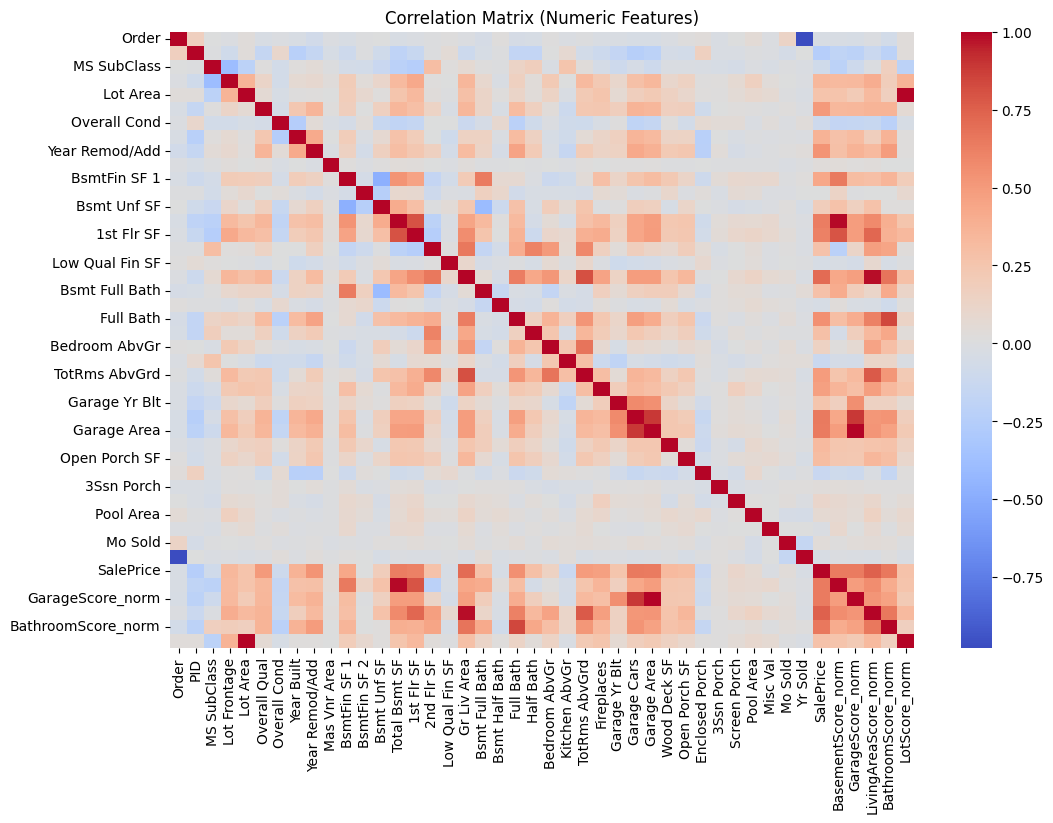

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()


###From the heatmap, it is clear that the combined feature scores show strong correlations with other variables in the dataset. This indicates that these normalized composite features effectively capture relationships between different feature attributes, reflecting how variables are interconnected in influencing house characteristics.

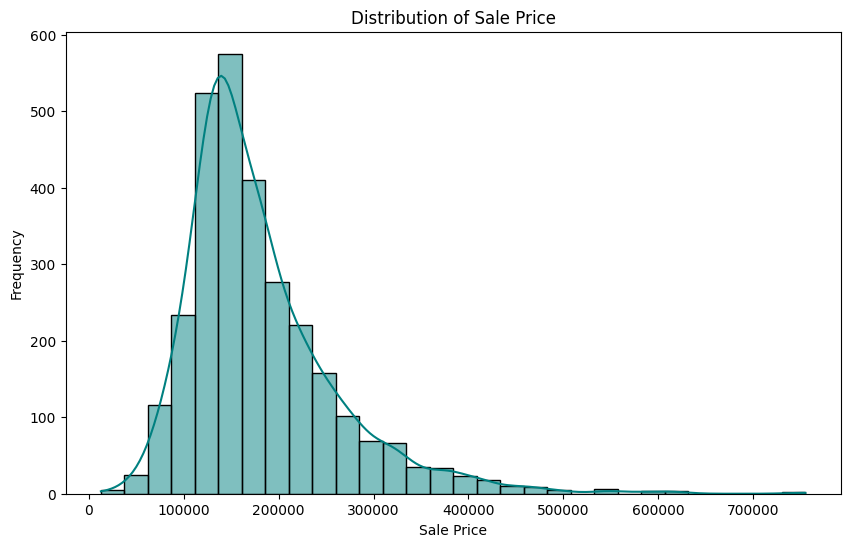

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='teal')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

###Most houses are priced between 100000 and 200000, while fewer properties are sold at higher prices, indicating that expensive houses are relatively rare in the dataset.

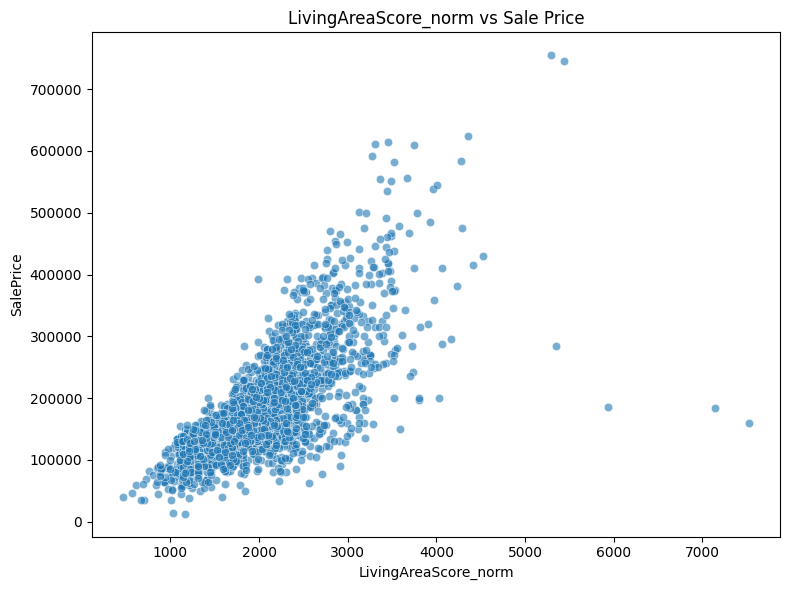

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='LivingAreaScore_norm', y='SalePrice', alpha=0.6)
plt.title('LivingAreaScore_norm vs Sale Price')
plt.tight_layout()
plt.show()

##The columns PID and Order values are all unique, so these columns will not much help with the predictions, so these two values can be dropped from the table

In [ ]:
df=df.drop('Order', axis=1)
df= df.drop("PID", axis=1)
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,BasementScore_norm,GarageScore_norm,LivingAreaScore_norm,BathroomScore_norm,LotScore_norm
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5,2010,WD,Normal,215000,1206.505896,483.005753,2320.468724,1.594141,16707.386580
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,6,2010,WD,Normal,105000,1001.743542,666.181272,1255.836909,1.000000,6142.460768
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,6,2010,WD,Normal,172000,1509.085627,288.886138,1862.360346,1.438843,7519.992374
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,4,2010,WD,Normal,244000,2316.641814,477.836089,2956.395145,3.032984,5914.127366
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,3,2010,WD,Normal,189900,1081.482155,441.731291,2001.903379,2.438843,7285.262611


#Split dataset into train/test splits

In [ ]:
features = [ 'Overall Qual', 'Overall Cond', 'LivingAreaScore_norm',
    'BasementScore_norm', 'GarageScore_norm', 'BathroomScore_norm',
    'LotScore_norm','Year Built','Year Remod/Add','Total Bsmt SF', 'Gr Liv Area']

X = df[features]
y = df['House Style']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
    random_state=42, stratify=y )


#Remove outliers in the train split only

In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(X_train))
val = (z_scores < 2.5).all(axis=1)

X_train = X_train.loc[val]
y_train = y_train.loc[val]

#Create a scaler object on the train split

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#Modeling for Each Task

#Classification

##Implement and evaluate at least two classification models

##Examples: Logistic Regression, k-NN, Decision Tree, Naive Bayes

##Include metrics: Accuracy, Precision, Recall, F1

##Include confusion matrix (and ROC curve if applicable)

In [ ]:
log_reg = LogisticRegression(max_iter=3000, class_weight="balanced", multi_class="multinomial", solver="lbfgs")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred))
print("Train accuracy:", log_reg.score(X_train, y_train))
print("Test accuracy:", log_reg.score(X_test, y_test))
print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)

=== Logistic Regression ===
              precision    recall  f1-score   support

      1.5Fin       0.71      0.74      0.73        94
      1.5Unf       0.06      0.67      0.11         6
      1Story       0.94      0.55      0.69       444
      2.5Fin       0.00      0.00      0.00         2
      2.5Unf       0.12      0.86      0.21         7
      2Story       0.95      0.71      0.81       262
      SFoyer       0.15      0.64      0.24        25
        SLvl       0.18      0.44      0.26        39

    accuracy                           0.62       879
   macro avg       0.39      0.58      0.38       879
weighted avg       0.85      0.62      0.69       879

Train accuracy: 0.6411332633788038
Test accuracy: 0.6188850967007964
Intercept: [  2.83321167  -3.68901557   3.45140148 -10.22889096   0.06093313
   2.89993576   1.2924743    3.37995018]
Coefficients: [[-0.02647774 -0.24460126 -0.94939827 -0.56737337  0.16235803  0.32585588
   0.38805933 -0.74151279 -0.10430416  0.14790

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


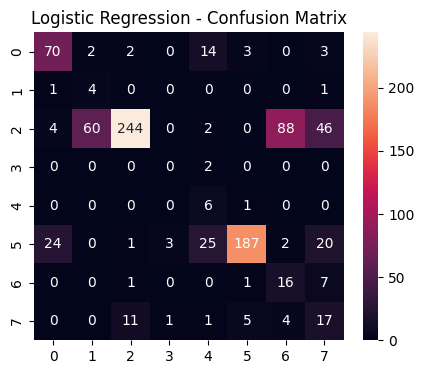

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Logistic Regression - Confusion Matrix")

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

print(classification_report(y_test,y_pred))
print("Train accuracy:", knn.score(X_train, y_train))
print("Test accuracy:", knn.score(X_test, y_test))

              precision    recall  f1-score   support

      1.5Fin       0.55      0.63      0.59        94
      1.5Unf       0.00      0.00      0.00         6
      1Story       0.87      0.93      0.90       444
      2.5Fin       0.00      0.00      0.00         2
      2.5Unf       0.00      0.00      0.00         7
      2Story       0.83      0.88      0.86       262
      SFoyer       0.00      0.00      0.00        25
        SLvl       0.44      0.18      0.25        39

    accuracy                           0.81       879
   macro avg       0.34      0.33      0.32       879
weighted avg       0.77      0.81      0.78       879

Train accuracy: 0.8725078698845751
Test accuracy: 0.8054607508532423


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


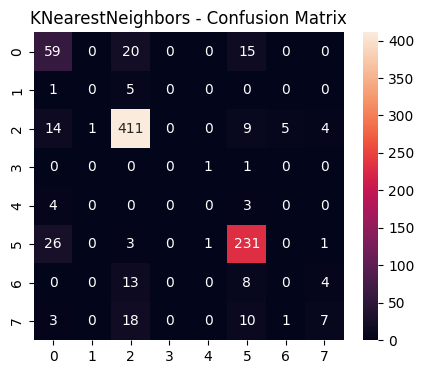

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("KNearestNeighbors - Confusion Matrix")

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=14, min_samples_leaf=5,
    class_weight="balanced_subsample", random_state=42, n_jobs=-1 )

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Train acc:', rf.score(X_train, y_train))
print('Test acc: ', rf.score(X_test,y_test))

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      1.5Fin       0.55      0.79      0.65        94
      1.5Unf       0.18      0.33      0.24         6
      1Story       0.93      0.87      0.90       444
      2.5Fin       0.00      0.00      0.00         2
      2.5Unf       0.00      0.00      0.00         7
      2Story       0.86      0.84      0.85       262
      SFoyer       0.54      0.52      0.53        25
        SLvl       0.46      0.33      0.39        39

    accuracy                           0.81       879
   macro avg       0.44      0.46      0.44       879
weighted avg       0.82      0.81      0.81       879

Train acc: 0.9260230849947534
Test acc:  0.8088737201365188


#Regression

##Implement and evaluate at least two regression models

##Examples: Linear Regression, Ridge, Decision Tree Regressor

##Include metrics: RMSE, MAE, R²

##Plot residuals, trees, or error distributions

In [ ]:
features = [
    'Overall Qual', 'Overall Cond','LivingAreaScore_norm',
    'BasementScore_norm','GarageScore_norm',
    'BathroomScore_norm','LotScore_norm',
    'Year Built','Year Remod/Add',
    'Total Bsmt SF', 'Gr Liv Area']

X = df[features]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )


In [ ]:
z_scores = np.abs(stats.zscore(X_train))
mask = (z_scores < 2.5).all(axis=1)

X_train = X_train.loc[mask]
y_train = y_train.loc[mask]

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print("R² Score:", r2_score(y_test, y_pred))
print("Estimated intercept weight :",reg.intercept_)
print("Coefficients :",reg.coef_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.8235920204475727
Estimated intercept weight : 171624.92050209205
Coefficients : [ 24180.68726762   3987.40050548  -1491.85928054  52306.02861519
   6559.7166327   -2075.84454775   6743.21588769  11172.47686513
   5399.93404602 -40157.73970752  22729.53600064]
RMSE: 35214.30358504453
MSE: 1240047176.9796803


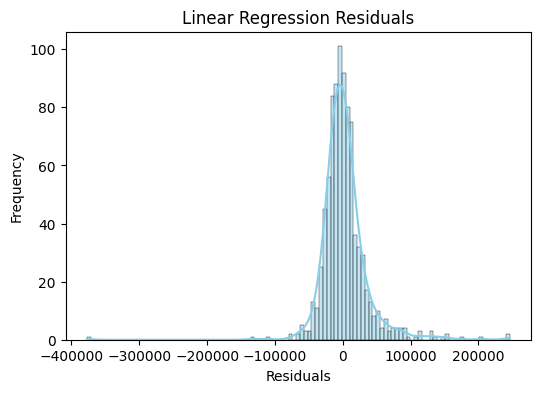

In [ ]:
residuals_lr = y_test - reg.predict(X_test)

plt.figure(figsize=(6,4))
sns.histplot(residuals_lr, kde=True, color="skyblue")
plt.title("Linear Regression Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Intercept:", ridge.intercept_)
print("Coefficients:", ridge.coef_)


R²: 0.8235844567441317
RMSE: 35215.058504677174
Intercept: 171624.92050209205
Coefficients: [ 24132.09915313   4037.1006048    -961.45468119  50300.87355276
   6576.27111054  -1853.00737635   6745.52589546  11157.79890304
   5344.26894277 -38239.21556387  22087.5759482 ]


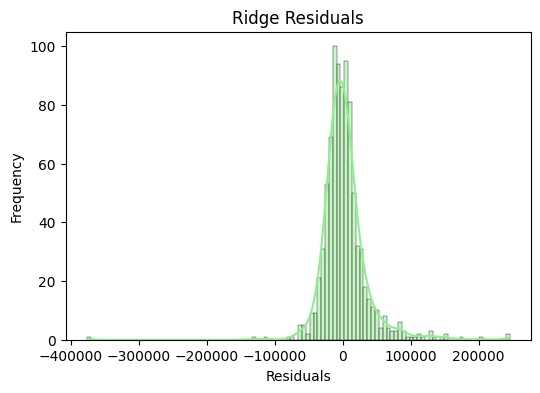

In [ ]:
residuals_ridge = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals_ridge, kde=True, color="lightgreen")
plt.title("Ridge Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("Gradient Boosting Regressor")
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


Gradient Boosting Regressor
R²: 0.9038390760483925
RMSE: 25999.159289275394
MAE: 15319.523953105763


In [ ]:
from sklearn.linear_model import ElasticNet

ridge_model = ElasticNet(alpha=1, l1_ratio=0).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)


print("R² Score:", r2_score(y_test, y_pred))
print("Estimated intercept weight :",ridge_model.intercept_)
print("Coefficients :",ridge_model.coef_)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:", mean_squared_error(y_test, y_pred))

print("\n",ridge_model.score(X_train,y_train))

R² Score: 0.7649919430619192
Estimated intercept weight : 171624.92050209205
Coefficients : [11955.41123729  1099.13836306  7813.58921369  6146.1291418
  6988.44605751  5909.23802557  4219.87846209  6831.33842438
  5959.50148646  5260.7384901   7630.39140935]
RMSE: 40644.46084198936
MSE: 1651972197.1360068

 0.7981113160719643


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.318e+12, tolerance: 8.200e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


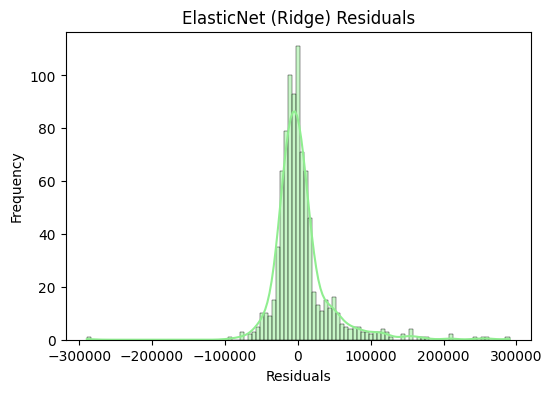

In [ ]:
residuals_ridge = y_test - ridge_model.predict(X_test)

plt.figure(figsize=(6,4))
sns.histplot(residuals_ridge, kde=True, color="lightgreen")
plt.title("ElasticNet (Ridge) Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


#Clustering

##Implement and evaluate at least two clustering algorithms

##Examples: K-Means, DBSCAN, Agglomerative Clustering

##Visualize clusters (e.g., via PCA)

##Report inertia, silhouette score, and number of clusters detected

In [ ]:
cluster_features = [
    'Overall Qual', 'Overall Cond',
    'LivingAreaScore_norm', 'BasementScore_norm',
    'GarageScore_norm','BathroomScore_norm',
    'LotScore_norm','Year Built',
    'Year Remod/Add','Total Bsmt SF','Gr Liv Area' ]

X_cluster = df[cluster_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=3, random_state=42)
label = kmeans.fit_predict(X_scaled)


#metrics
print("\n=== CLUSTERING: K-Means===")
print("Silhouette Score:", silhouette_score(X_scaled, label))
print("Inertia:", kmeans.inertia_)
print("Cluster Labels:", label)
print("Centroids:\n", kmeans.cluster_centers_)
print("Number of clusters:", kmeans.n_clusters)



=== CLUSTERING: K-Means===
Silhouette Score: 0.1978933258547645
Inertia: 21903.581486510866
Cluster Labels: [2 2 2 ... 2 2 0]
Centroids:
 [[ 0.50235861 -0.31655634  0.74825655  0.65582097  0.65649484  0.80117898
   0.24234638  0.47353787  0.63226072  0.67544089  0.70199528]
 [-0.32597781  1.49162083 -0.53469555 -0.5319515  -0.54648566 -0.69683305
  -0.186642   -0.65218664  0.06337458 -0.54177613 -0.48239304]
 [-0.38610226 -0.40151488 -0.55045098 -0.45071244 -0.4441632  -0.52705804
  -0.17153092 -0.19103777 -0.72339415 -0.46724908 -0.52606707]]
Number of clusters: 3


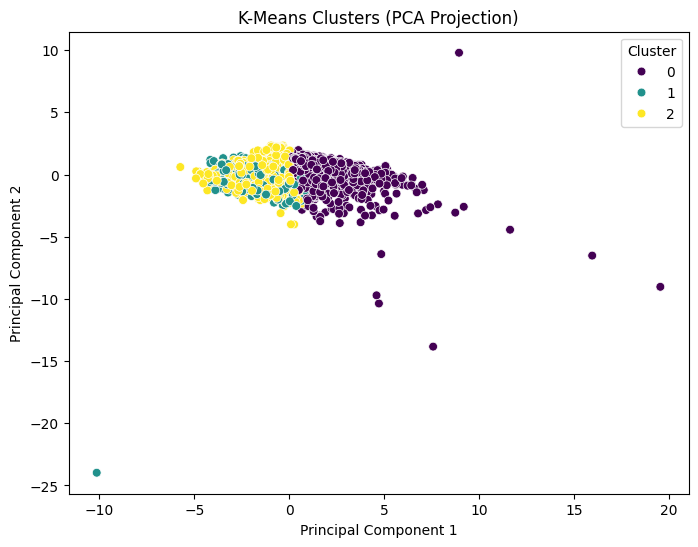

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Cluster'] = label

plt.figure(figsize=(8,6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2',
    hue='Cluster', palette='viridis', s=40)\

plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=20)
db_labels = dbscan.fit_predict(X_scaled)

In [ ]:
mask = db_labels != -1

if len(set(db_labels[mask])) > 1:
    print("DBSCAN Silhouette Score:",
          silhouette_score(X_scaled[mask], db_labels[mask]))
else:
    print("Silhouette score not defined (single cluster)")


DBSCAN Silhouette Score: 0.1357464424144327


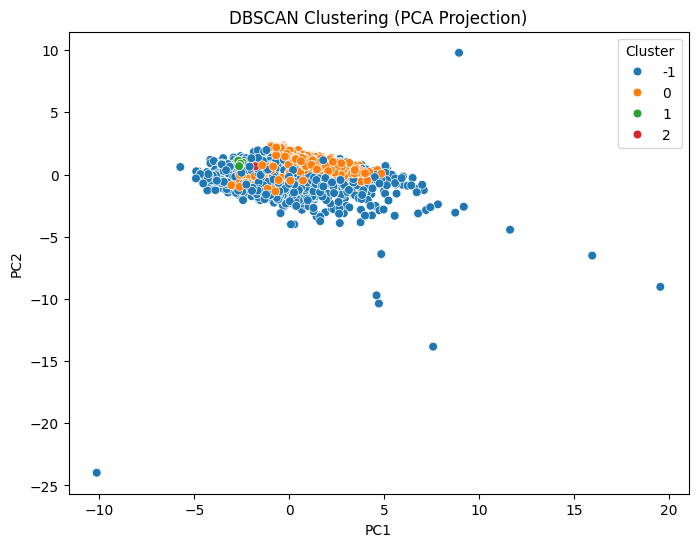

In [ ]:
X_pca_df['DBSCAN_Cluster'] = db_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X_pca_df,
    x='PC1',
    y='PC2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    s=40
)
plt.title("DBSCAN Clustering (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

agg_labels = agg.fit_predict(X_scaled)

print("\n=== CLUSTERING: Agglomerative ===")
print("Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print("Number of clusters:", len(set(agg_labels)))


=== CLUSTERING: Agglomerative ===
Silhouette Score: 0.17187723499149243
Number of clusters: 3


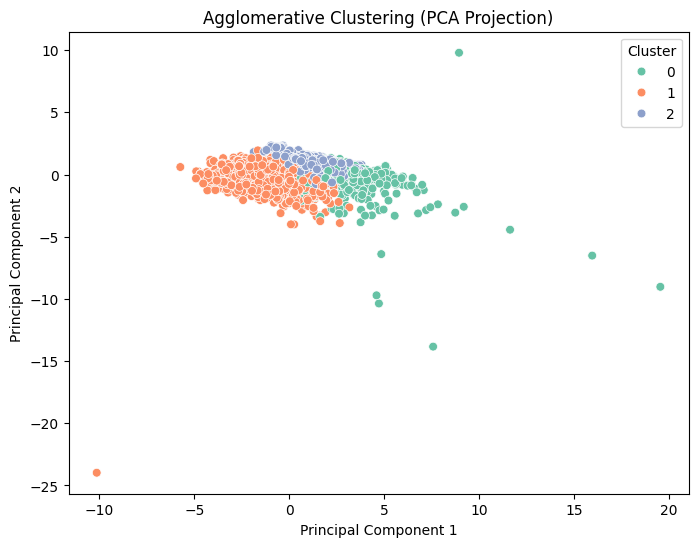

In [ ]:
X_pca_df['Agglomerative_Cluster'] = agg_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=X_pca_df,
    x='PC1',
    y='PC2',
    hue='Agglomerative_Cluster',
    palette='Set2',
    s=40
)

plt.title("Agglomerative Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
